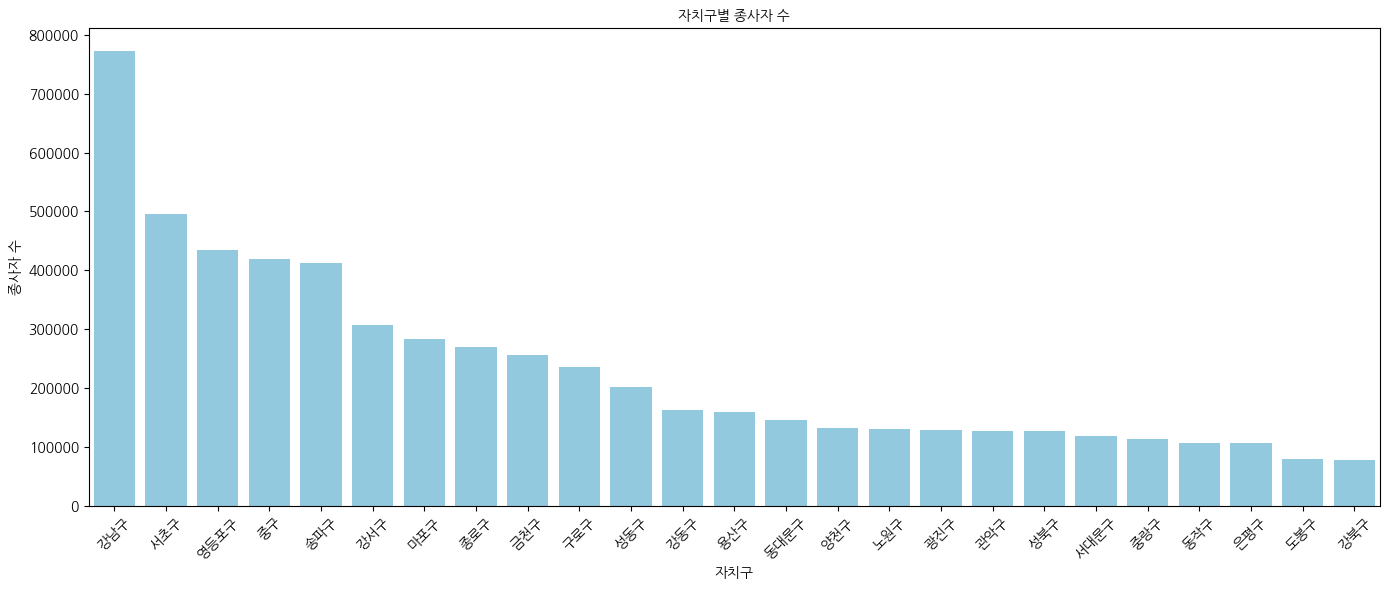

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.font_manager as fm
from sqlalchemy import create_engine

# ✅ 폰트 설정 (한글 깨짐 방지)
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ 데이터 불러오기 (이미 MySQL에 넣었다면 다시 불러와도 OK)
import mysql.connector
from sqlalchemy import create_engine

# MySQL 연결
user = "root"
password = "jinhyuk2dacibul"
host = "jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com"
port = 3306
database = "project1"
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

# 테이블 읽기
df = pd.read_sql("SELECT * FROM employment_gu", con=engine)

# ✅ 자치구별 종사자 수 시각화
plt.figure(figsize=(14, 6))
sns.barplot(data=df.sort_values(by='num_employees', ascending=False),
            x='gu_name', y='num_employees', color='skyblue')

plt.title("자치구별 종사자 수", fontproperties=fontprop)
plt.xlabel("자치구", fontproperties=fontprop)
plt.ylabel("종사자 수", fontproperties=fontprop)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📌 상관계수 (Pearson r): 0.2942


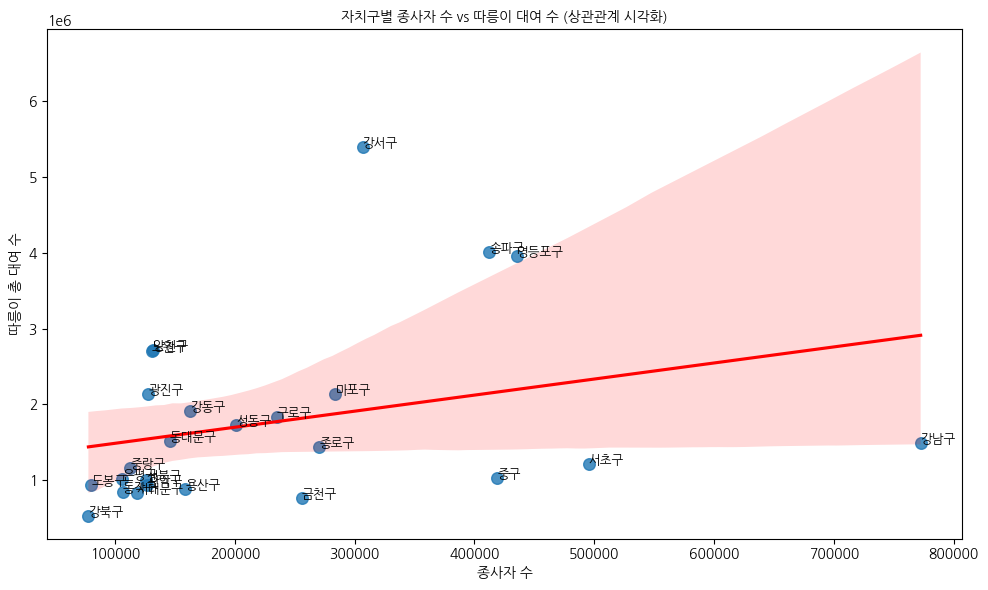

In [8]:


# ✅ 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ MySQL 연결
user = "root"
password = "jinhyuk2dacibul"
host = "jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com"
port = 3306
database = "project1"
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

# ✅ 데이터 불러오기
df_emp = pd.read_sql("SELECT gu_name, num_employees FROM employment_gu", con=engine)
df_rental = pd.read_sql("""
    SELECT station_gu AS gu_name, SUM(rental_count) AS total_rentals 
    FROM rental_net_hourly_gu 
    GROUP BY station_gu
""", con=engine)

# ✅ 병합
merged = pd.merge(df_emp, df_rental, on="gu_name")

# ✅ 상관계수 계산
corr, _ = pearsonr(merged['num_employees'], merged['total_rentals'])
print(f"📌 상관계수 (Pearson r): {corr:.4f}")

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.regplot(data=merged, x='num_employees', y='total_rentals', scatter_kws={'s': 70}, line_kws={'color': 'red'}, ci=95)

# 자치구 라벨 표시
for _, row in merged.iterrows():
    plt.text(row['num_employees'], row['total_rentals'], row['gu_name'], fontsize=9, fontproperties=fontprop)

plt.title("자치구별 종사자 수 vs 따릉이 대여 수 (상관관계 시각화)", fontproperties=fontprop)
plt.xlabel("종사자 수", fontproperties=fontprop)
plt.ylabel("따릉이 총 대여 수", fontproperties=fontprop)
plt.tight_layout()
plt.show()


/tmp/ipykernel_24204/4199385210.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_business = pd.read_sql(query_business, conn)
/tmp/ipykernel_24204/4199385210.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


📌 상관계수 (Pearson r): 0.4232


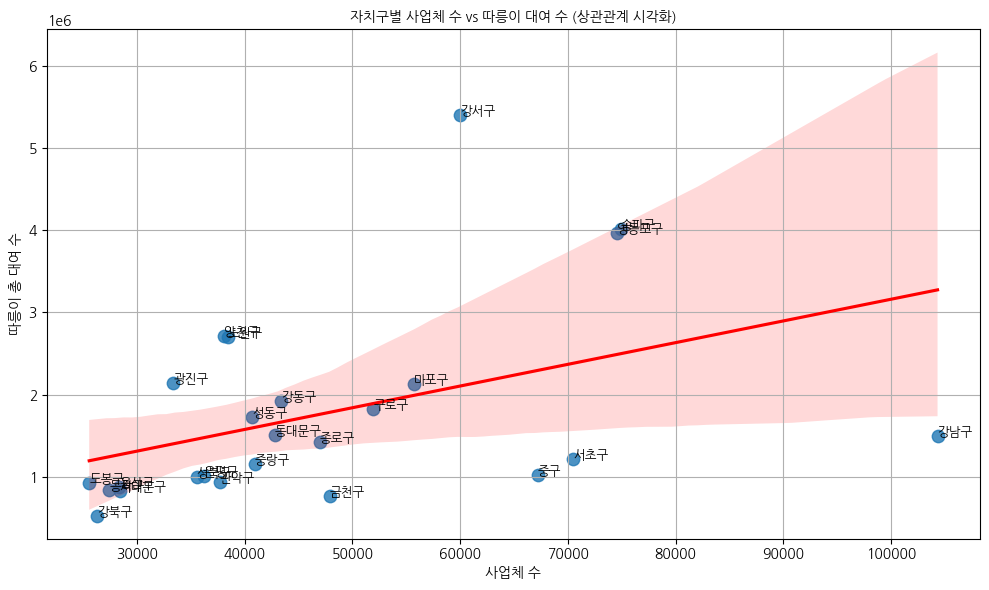

In [11]:


# ✅ 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 데이터 불러오기 (사업체 수: employment_gu, 대여 수: rental_net_hourly_gu)
query_business = "SELECT gu_name, num_businesses FROM employment_gu"
query_rental = """
    SELECT station_gu AS gu_name, SUM(rental_count) AS total_rentals 
    FROM rental_net_hourly_gu
    GROUP BY station_gu
"""
df_business = pd.read_sql(query_business, conn)
df_rental = pd.read_sql(query_rental, conn)
conn.close()

# ✅ 병합
merged_df = pd.merge(df_business, df_rental, on="gu_name")

# ✅ 상관계수 계산
corr, _ = pearsonr(merged_df['num_businesses'], merged_df['total_rentals'])
print(f"📌 상관계수 (Pearson r): {corr:.4f}")

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_df,
    x='num_businesses',
    y='total_rentals',
    scatter_kws={'s': 80},
    line_kws={'color': 'red'},
    ci=95
)

# ✅ 자치구 라벨 직접 표시
for _, row in merged_df.iterrows():
    plt.text(row['num_businesses'], row['total_rentals'], row['gu_name'],
             fontsize=9, fontproperties=fontprop)

# ✅ 제목 및 라벨
plt.title("자치구별 사업체 수 vs 따릉이 대여 수 (상관관계 시각화)", fontproperties=fontprop)
plt.xlabel("사업체 수", fontproperties=fontprop)
plt.ylabel("따릉이 총 대여 수", fontproperties=fontprop)

plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_20439/188636266.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_density = pd.read_sql(query_density, conn)
/tmp/ipykernel_20439/188636266.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


📌 상관계수 (Pearson r): 0.0187


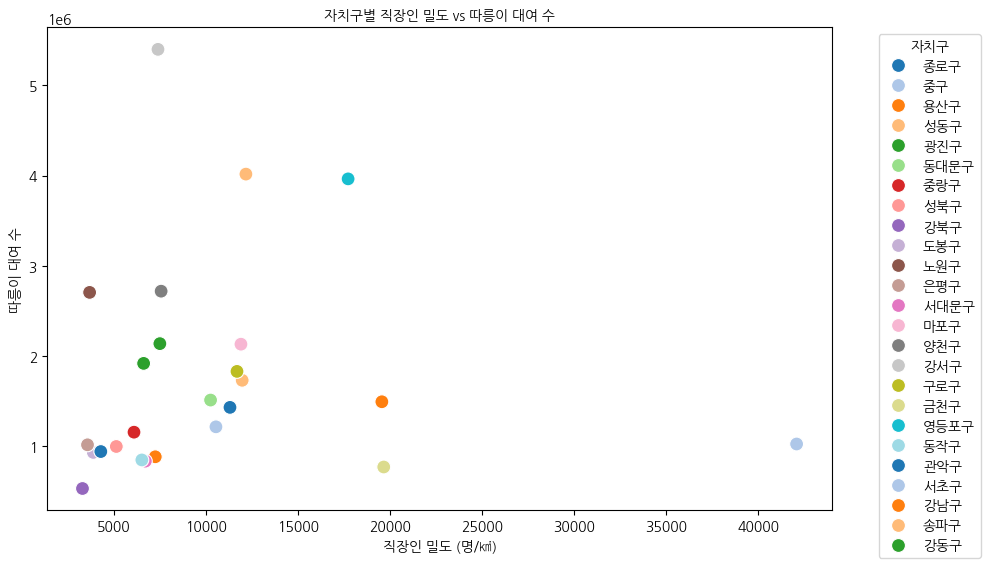

In [5]:


# 🔗 MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    user="root",
    password="jinhyuk2dacibul",
    database="project1",
    port=3306
)

# 🔎 1. 직장인 밀도 데이터
query_density = """
SELECT gu_name, employee_density FROM business_employment;
"""
df_density = pd.read_sql(query_density, conn)

# 🔎 2. 따릉이 대여량 데이터
query_rental = """
SELECT station_gu AS gu_name, SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
df_rental = pd.read_sql(query_rental, conn)

# 🔄 3. 병합
merged_df = pd.merge(df_density, df_rental, on="gu_name")

# 📊 4. 상관계수 계산
corr, _ = pearsonr(merged_df["employee_density"], merged_df["total_rentals"])
print(f"📌 상관계수 (Pearson r): {corr:.4f}")

# 🔤 5. 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = fontprop.get_name()
plt.rcParams["axes.unicode_minus"] = False

# 🎯 6. 시각화 (산점도)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x="employee_density",
    y="total_rentals",
    hue="gu_name",
    palette="tab20",
    s=100
)

plt.title("자치구별 직장인 밀도 vs 따릉이 대여 수", fontproperties=fontprop)
plt.xlabel("직장인 밀도 (명/㎢)", fontproperties=fontprop)
plt.ylabel("따릉이 대여 수", fontproperties=fontprop)
plt.legend(title="자치구", bbox_to_anchor=(1.05, 1), loc="upper left", prop=fontprop)
plt.tight_layout()
plt.show()


/tmp/ipykernel_20439/2019596365.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_business = pd.read_sql(query_business, conn)
/tmp/ipykernel_20439/2019596365.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_bike = pd.read_sql(query_bike, conn)
/tmp/ipykernel_20439/2019596365.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


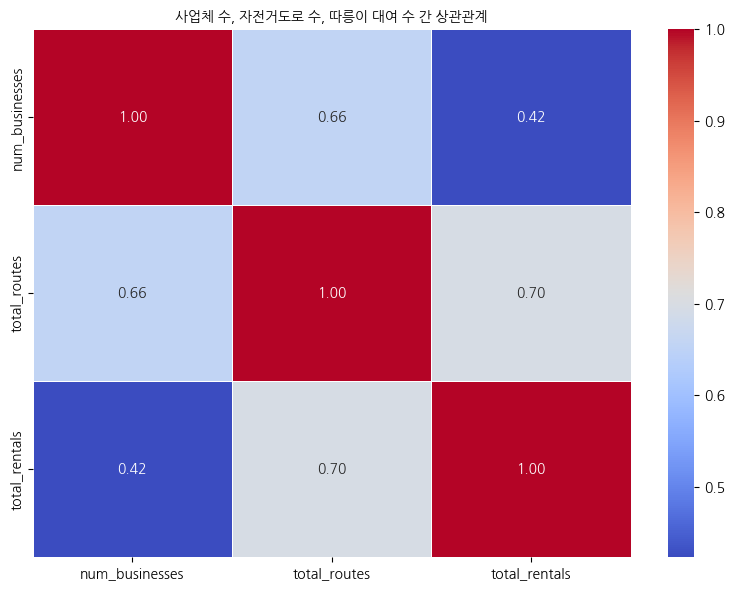

In [6]:

# ✅ 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 1. 사업체 수
query_business = "SELECT gu_name, num_businesses FROM business_employment"
df_business = pd.read_sql(query_business, conn)

# ✅ 2. 자전거도로 총 노선 수
query_bike = "SELECT gu_name, total_routes FROM bike_roads"
df_bike = pd.read_sql(query_bike, conn)

# ✅ 3. 따릉이 대여 수
query_rental = """
SELECT station_gu AS gu_name, SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu
"""
df_rental = pd.read_sql(query_rental, conn)

conn.close()

# ✅ 4. 병합
merged = df_business.merge(df_bike, on="gu_name").merge(df_rental, on="gu_name")

# ✅ 5. 상관계수 행렬 계산
corr_matrix = merged[["num_businesses", "total_routes", "total_rentals"]].corr()

# ✅ 6. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("사업체 수, 자전거도로 수, 따릉이 대여 수 간 상관관계", fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.tight_layout()
plt.show()


In [ ]:

# ✅ 1. CSV 파일 불러오기
file_path = "/home/kbj/Downloads/사업체+및+종사자+밀도(동별)_20250324160036.csv"
df = pd.read_csv(file_path, encoding='utf-8')  # 인코딩은 필요시 'utf-8'로 바꿔도 됨

# ✅ 2. 컬럼명 영문으로 변경
df.columns = [
    "gu_name",             # 자치구명
    "dong_name",           # 행정동명
    "num_businesses",      # 사업체 수
    "num_employees",       # 종사자 수
    "avg_employees",       # 평균 종사자 수
    "business_density",    # 사업체 밀도
    "employee_density",    # 종사자 밀도 (A)
    "population_density",  # 인구 밀도 (B)
    "employee_to_pop_ratio"  # 종사자밀도비 (A/B * 100)
]

# ✅ 3. MySQL 연결 정보
user = "root"
password = "jinhyuk2dacibul"
host = "jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com"
port = 3306
database = "project1"

# ✅ 4. SQLAlchemy 엔진 생성
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

# ✅ 5. 데이터 업로드
df.to_sql("business_employment_dong", con=engine, index=False, if_exists="replace")  # or 'append'

print("✅ MySQL 테이블 업로드 완료: business_employment_dong")


✅ MySQL 테이블 업로드 완료: business_employment_dong


/tmp/ipykernel_24204/1324642813.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


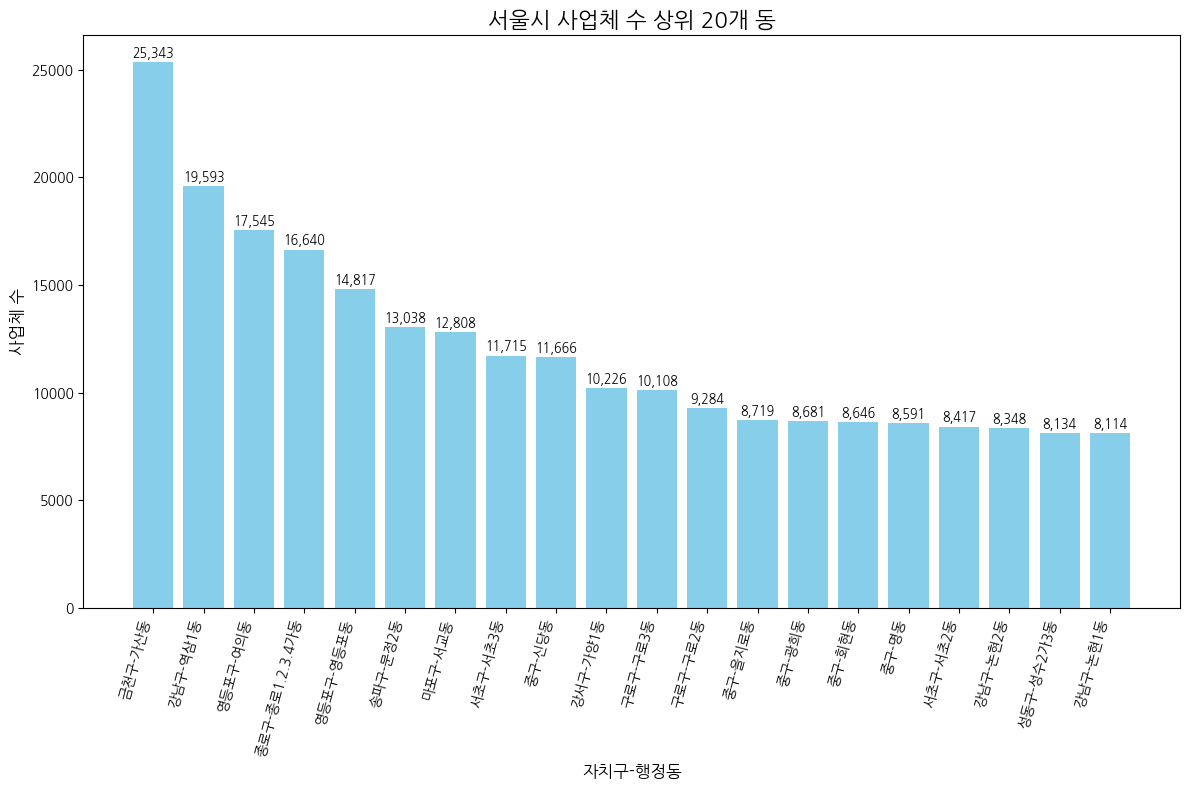

In [14]:

# ✅ MySQL에서 데이터 가져오기
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

query = """
SELECT gu_name, dong_name, num_businesses
FROM employment_dong
"""
df = pd.read_sql(query, conn)
conn.close()

# ✅ 구-동 이름 생성
df["label"] = df["gu_name"] + "-" + df["dong_name"]

# ✅ 사업체 수 기준 상위 20개만 추출
top20 = df.sort_values("num_businesses", ascending=False).head(20)

# ✅ 시각화 (수직 막대 그래프)
plt.figure(figsize=(12, 8))
bars = plt.bar(top20["label"], top20["num_businesses"], color='skyblue')

# ✅ 라벨 회전 & 값 표시
plt.xticks(rotation=75, ha='right')
plt.title("서울시 사업체 수 상위 20개 동", fontsize=16)
plt.xlabel("자치구-행정동", fontsize=12)
plt.ylabel("사업체 수", fontsize=12)

# ✅ 바 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


/tmp/ipykernel_24204/1375532440.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/tmp/ipykernel_24204/1375532440.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, y="label", x="num_employees", palette="coolwarm")


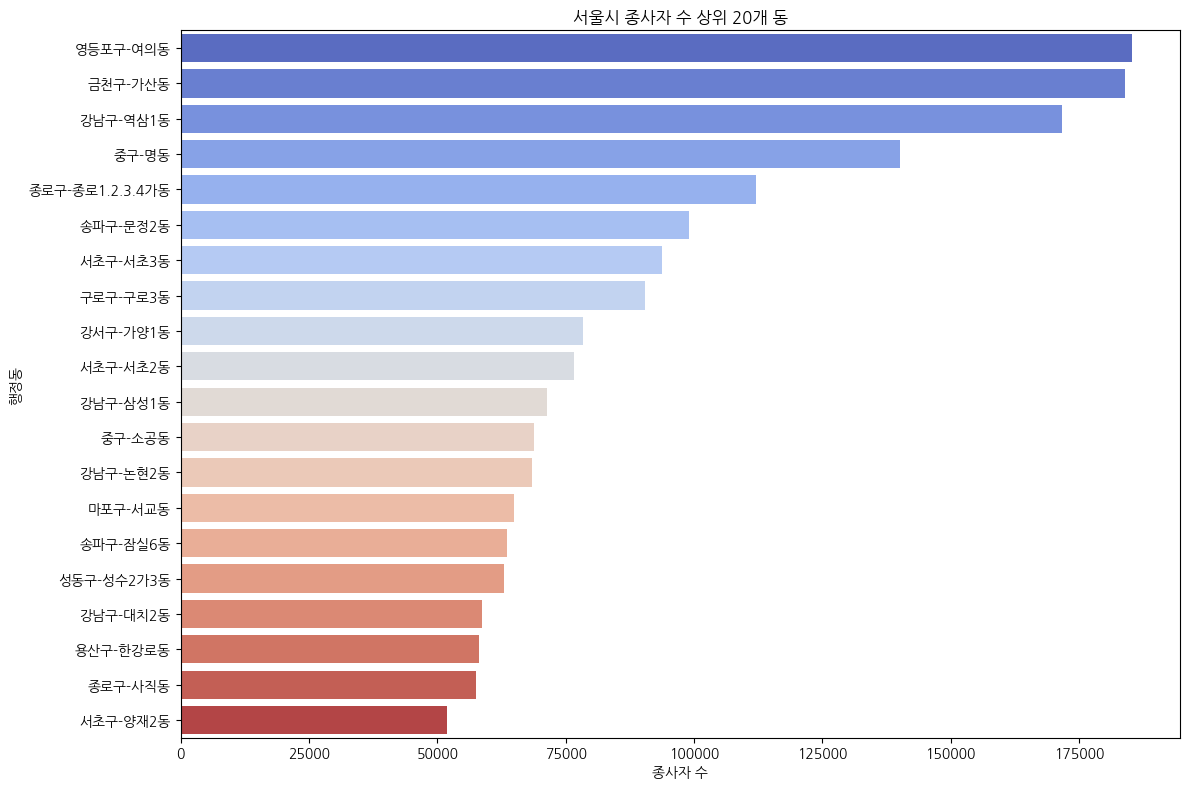

In [21]:
# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 데이터 가져오기
query = """
SELECT gu_name, dong_name, num_employees
FROM employment_dong
"""
df = pd.read_sql(query, conn)
conn.close()

# ✅ 구-동 컬럼 생성
df["label"] = df["gu_name"] + "-" + df["dong_name"]

# ✅ 종사자 수 상위 20개 동 추출
top20 = df.sort_values("num_employees", ascending=False).head(20)

# ✅ 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=top20, y="label", x="num_employees", palette="coolwarm")
plt.title("서울시 종사자 수 상위 20개 동")
plt.xlabel("종사자 수")
plt.ylabel("행정동")
plt.tight_layout()
plt.show()

/tmp/ipykernel_24204/1984323347.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


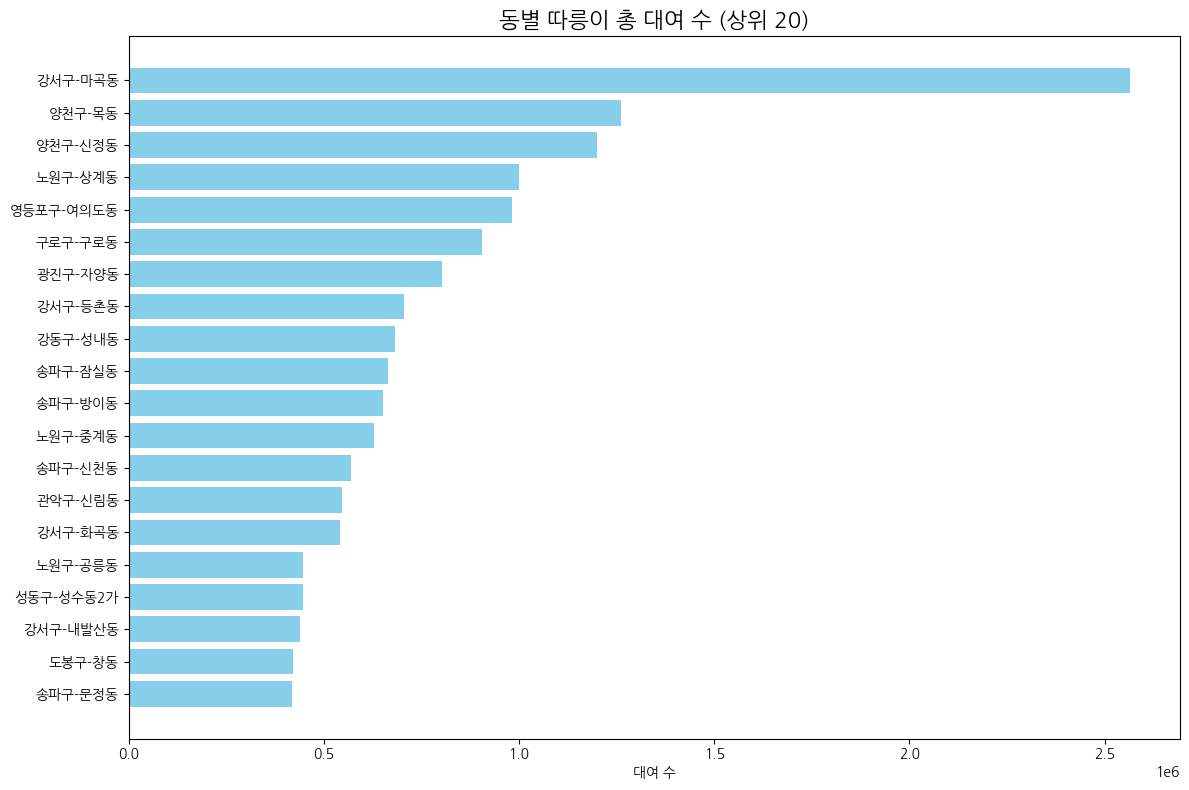

In [15]:
import koreanize_matplotlib  # ✅ 한글 폰트 자동 설정

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 데이터 불러오기
query = """
SELECT s.station_dong, s.station_gu, r.total_rental_count
FROM rental_station r
JOIN station s ON r.rental_station_id = s.station_id
"""

df = pd.read_sql(query, conn)
conn.close()

# ✅ 동 단위 총 대여수 집계
df_grouped = df.groupby(['station_gu', 'station_dong'])['total_rental_count'].sum().reset_index()
df_grouped['label'] = df_grouped['station_gu'] + "-" + df_grouped['station_dong']

# ✅ 상위 20개 추출
top20 = df_grouped.sort_values('total_rental_count', ascending=False).head(20)

# ✅ 시각화
plt.figure(figsize=(12, 8))
bars = plt.barh(top20['label'], top20['total_rental_count'], color='skyblue')
plt.title("동별 따릉이 총 대여 수 (상위 20)", fontsize=16)
plt.xlabel("대여 수")
plt.gca().invert_yaxis()  # 상위 항목이 위로 오게
plt.tight_layout()
plt.show()


/tmp/ipykernel_57241/765138075.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)
/tmp/ipykernel_57241/765138075.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_station = pd.read_sql(query_station, conn)
/tmp/ipykernel_57241/765138075.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_emp = pd.read_sql(query_employment, conn)


📌 상관계수 (r): 0.48


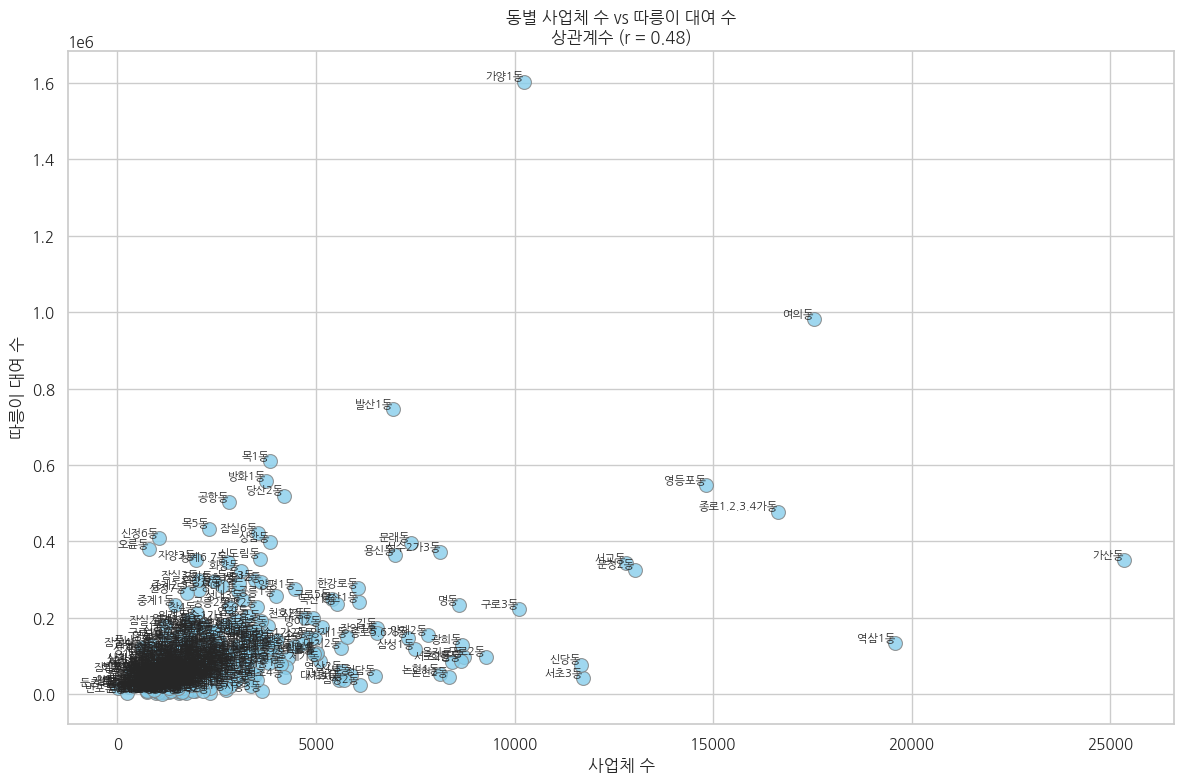

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import mysql.connector
import koreanize_matplotlib

# ✅ DB 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)
plt.rcParams['font.family'] = 'NanumGothic'

# ✅ 따릉이 대여소별 총 대여수
query_rental = "SELECT * FROM rental_station"
df_rental = pd.read_sql(query_rental, conn)

# ✅ 대여소 ID별 행정동 정보
query_station = "SELECT station_id, station_gu, station_dong FROM station_b"
df_station = pd.read_sql(query_station, conn)

# ✅ 행정동별 사업체 수
query_employment = "SELECT gu_name, dong_name, num_businesses FROM employment_dong"
df_emp = pd.read_sql(query_employment, conn)

conn.close()

# ✅ 대여소 + 위치 매핑
df_merge = pd.merge(df_rental, df_station, left_on="rental_station_id", right_on="station_id")

# ✅ 동별 총 대여량 집계
df_rental_by_dong = df_merge.groupby(["station_gu", "station_dong"])["total_rental_count"].sum().reset_index()
df_rental_by_dong.columns = ["gu_name", "dong_name", "total_rental_count"]

# ✅ 병합: 사업체 수와 대여량
df_all = pd.merge(df_rental_by_dong, df_emp, on=["gu_name", "dong_name"])

# ✅ 상관계수 계산
corr, _ = pearsonr(df_all["num_businesses"], df_all["total_rental_count"])
print(f"📌 상관계수 (r): {corr:.2f}")

# ✅ 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_all,
    x="num_businesses",
    y="total_rental_count",
    s=100,
    color="skyblue",
    edgecolor="gray",
    alpha=0.8
)

# ✅ 각 점마다 동 이름 표시
for _, row in df_all.iterrows():
    label = f"{row['dong_name']}"
    plt.text(row["num_businesses"], row["total_rental_count"], label, fontsize=8, ha='right', va='bottom')

plt.title(f"동별 사업체 수 vs 따릉이 대여 수\n상관계수 (r = {corr:.2f})")
plt.xlabel("사업체 수")
plt.ylabel("따릉이 대여 수")
plt.tight_layout()
plt.show()


/tmp/ipykernel_57241/4196226031.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql("SELECT * FROM rental_station", conn)
/tmp/ipykernel_57241/4196226031.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_station = pd.read_sql("SELECT station_id, station_gu, station_dong FROM station_b", conn)
/tmp/ipykernel_57241/4196226031.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_emp = pd.read_sql("SELECT gu_name, dong_name, num_businesses FROM employment_dong", conn)


📌 상관계수 (r): 0.48


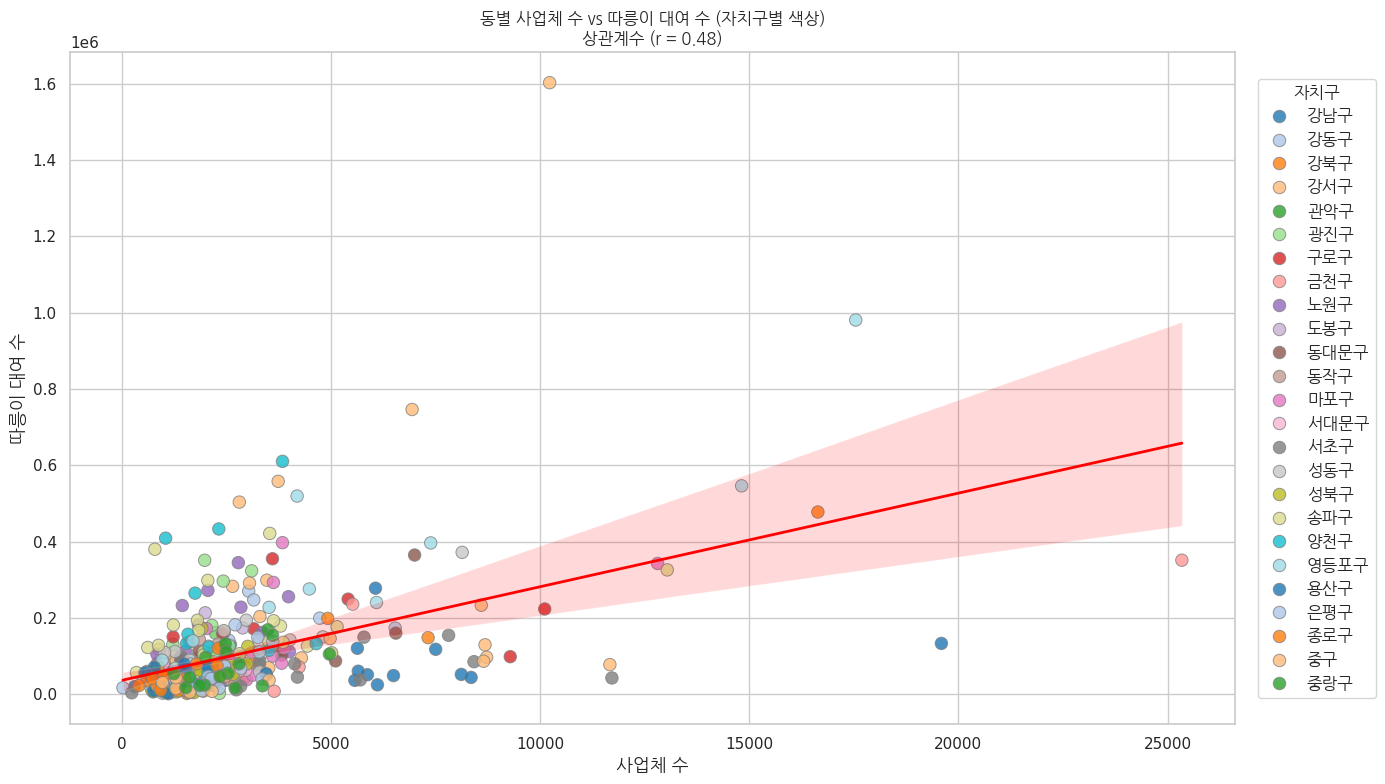

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import mysql.connector
import matplotlib.font_manager as fm

# ✅ 나눔고딕 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ DB 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 데이터 불러오기
df_rental = pd.read_sql("SELECT * FROM rental_station", conn)
df_station = pd.read_sql("SELECT station_id, station_gu, station_dong FROM station_b", conn)
df_emp = pd.read_sql("SELECT gu_name, dong_name, num_businesses FROM employment_dong", conn)
conn.close()

# ✅ 대여소 + 위치 매핑
df_merge = pd.merge(df_rental, df_station, left_on="rental_station_id", right_on="station_id")

# ✅ 동별 총 대여량 집계
df_rental_by_dong = df_merge.groupby(["station_gu", "station_dong"])["total_rental_count"].sum().reset_index()
df_rental_by_dong.columns = ["gu_name", "dong_name", "total_rental_count"]

# ✅ 병합
df_all = pd.merge(df_rental_by_dong, df_emp, on=["gu_name", "dong_name"])

# ✅ 상관계수 계산
corr, _ = pearsonr(df_all["num_businesses"], df_all["total_rental_count"])
print(f"📌 상관계수 (r): {corr:.2f}")

# ✅ 시각화 스타일 설정
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# ✅ 산점도 (자치구별 색상), 회귀선 포함
scatter = sns.scatterplot(
    data=df_all,
    x="num_businesses",
    y="total_rental_count",
    hue="gu_name",
    palette="tab20",
    s=80,
    alpha=0.8,
    edgecolor="gray"
)

# ✅ 회귀선은 전체 데이터 기준으로 1개만 추가
sns.regplot(
    data=df_all,
    x="num_businesses",
    y="total_rental_count",
    scatter=False,
    color="red",
    line_kws={"linewidth": 2}
)

# ✅ 타이틀 및 축 레이블
plt.title(f"동별 사업체 수 vs 따릉이 대여 수 (자치구별 색상)\n상관계수 (r = {corr:.2f})",
          fontsize=16, fontweight="bold", fontproperties=font_prop)
plt.xlabel("사업체 수", fontsize=13, fontproperties=font_prop)
plt.ylabel("따릉이 대여 수", fontsize=13, fontproperties=font_prop)

# ✅ 범례 오른쪽으로 이동 + 한글 폰트 적용
legend = plt.legend(title="자치구", bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0.)
legend.get_title().set_fontproperties(font_prop)
for text in legend.get_texts():
    text.set_fontproperties(font_prop)

plt.tight_layout()
plt.show()


In [48]:
# 대여소 ID별 동 정보 병합
df_merge = pd.merge(df_rental, df_station, left_on="rental_station_id", right_on="station_id")

# 전체 대여소 수
print("대여소 개수:", df_merge.shape[0])  # 2810개 예상

# 중복 제거한 동 개수
unique_dongs = df_merge[["station_gu", "station_dong"]].drop_duplicates()
print("고유 동 개수:", unique_dongs.shape[0])


대여소 개수: 2774
고유 동 개수: 434


In [47]:
# 대여소가 있는 동 목록 (388개)
rental_dongs = df_rental_by_dong[["gu_name", "dong_name"]].drop_duplicates()

# 사업체 수 데이터에 있는 동 목록
emp_dongs = df_emp[["gu_name", "dong_name"]].drop_duplicates()

# 병합되지 않은 동: 대여소는 있는데 사업체 수 데이터에는 없는 경우
missing_from_emp = pd.merge(
    rental_dongs, emp_dongs,
    on=["gu_name", "dong_name"],
    how="left", indicator=True
).query('_merge == "left_only"')[["gu_name", "dong_name"]]

print(f"❌ 사업체 데이터에 없는 동 개수: {missing_from_emp.shape[0]}")
display(missing_from_emp)


❌ 사업체 데이터에 없는 동 개수: 21


,gu_name,dong_name
16,강남구,양재2동
21,강남구,정동
31,강동구,상일제1동
32,강동구,상일제2동
55,강북구,창3동
63,강서구,목3동
87,관악구,신대방2동
127,금천구,가리봉동
137,금천구,하안3동
138,노원구,경기도 의정부시 장암동


/tmp/ipykernel_57241/2783653328.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql("SELECT * FROM rental_station", conn)
/tmp/ipykernel_57241/2783653328.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_station = pd.read_sql("SELECT station_id, station_gu, station_dong FROM station_b", conn)
/tmp/ipykernel_57241/2783653328.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_emp = pd.read_sql("SELECT gu_name, dong_name, num_employees FROM employment_dong", conn)  # 🔁 컬럼명에 주의


📌 상관계수 (r): 0.49


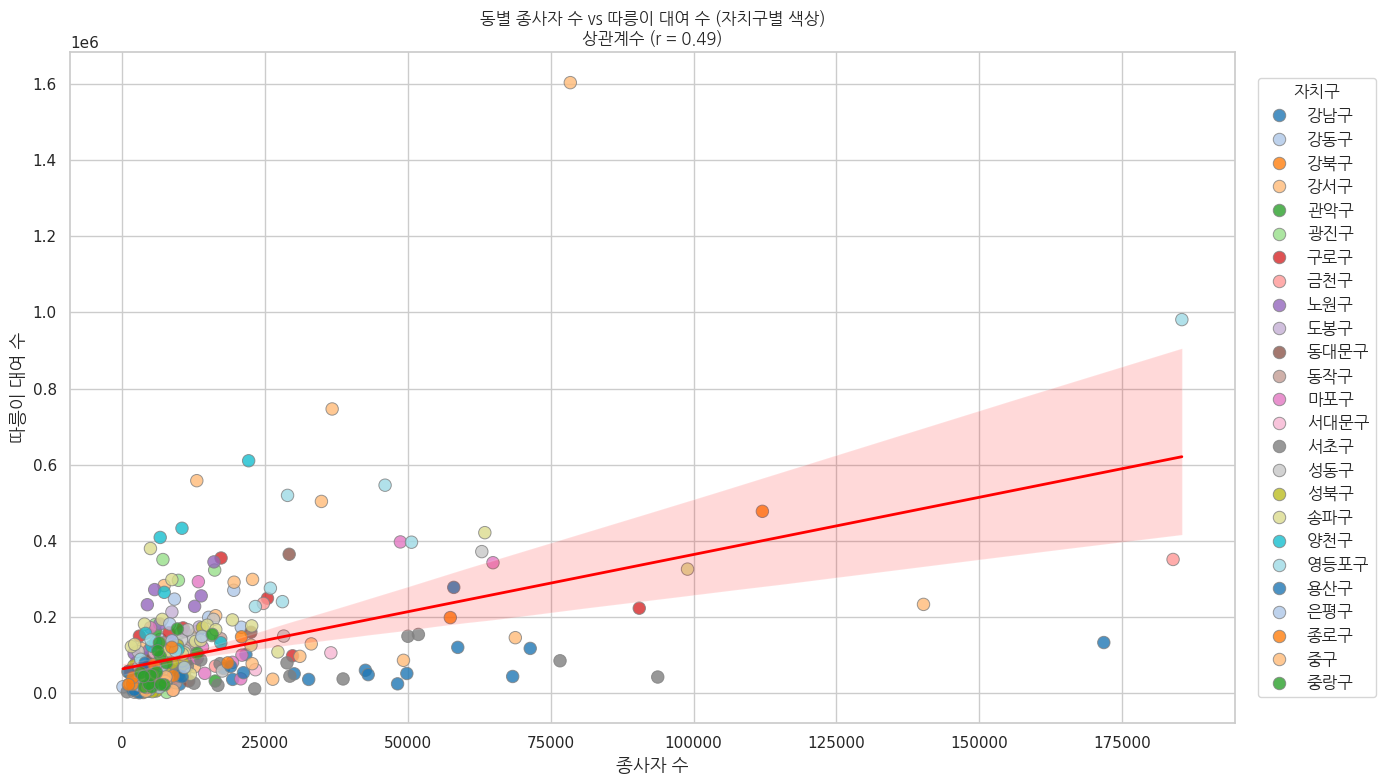

In [49]:

# ✅ 나눔고딕 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ DB 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 데이터 불러오기
df_rental = pd.read_sql("SELECT * FROM rental_station", conn)
df_station = pd.read_sql("SELECT station_id, station_gu, station_dong FROM station_b", conn)
df_emp = pd.read_sql("SELECT gu_name, dong_name, num_employees FROM employment_dong", conn)  # 🔁 컬럼명에 주의
conn.close()

# ✅ 대여소 + 위치 매핑
df_merge = pd.merge(df_rental, df_station, left_on="rental_station_id", right_on="station_id")

# ✅ 동별 총 대여량 집계
df_rental_by_dong = df_merge.groupby(["station_gu", "station_dong"])["total_rental_count"].sum().reset_index()
df_rental_by_dong.columns = ["gu_name", "dong_name", "total_rental_count"]

# ✅ 병합
df_all = pd.merge(df_rental_by_dong, df_emp, on=["gu_name", "dong_name"])

# ✅ 상관계수 계산
corr, _ = pearsonr(df_all["num_employees"], df_all["total_rental_count"])
print(f"📌 상관계수 (r): {corr:.2f}")

# ✅ 시각화 스타일 설정
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# ✅ 산점도 (자치구별 색상), 회귀선 포함
scatter = sns.scatterplot(
    data=df_all,
    x="num_employees",
    y="total_rental_count",
    hue="gu_name",
    palette="tab20",
    s=80,
    alpha=0.8,
    edgecolor="gray"
)

# ✅ 회귀선 (전체 데이터 기준)
sns.regplot(
    data=df_all,
    x="num_employees",
    y="total_rental_count",
    scatter=False,
    color="red",
    line_kws={"linewidth": 2}
)

# ✅ 타이틀 및 축 레이블
plt.title(f"동별 종사자 수 vs 따릉이 대여 수 (자치구별 색상)\n상관계수 (r = {corr:.2f})",
          fontsize=16, fontweight="bold", fontproperties=font_prop)
plt.xlabel("종사자 수", fontsize=13, fontproperties=font_prop)
plt.ylabel("따릉이 대여 수", fontsize=13, fontproperties=font_prop)

# ✅ 범례 오른쪽 + 한글 적용
legend = plt.legend(title="자치구", bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0.)
legend.get_title().set_fontproperties(font_prop)
for text in legend.get_texts():
    text.set_fontproperties(font_prop)

plt.tight_layout()
plt.show()
